Upload images containing faces within 2 meters:


Saving robert_downey_jr4.png to robert_downey_jr4 (4).png
Upload images containing faces within 5 meters:


Saving robert_downey_jr1.png to robert_downey_jr1 (4).png


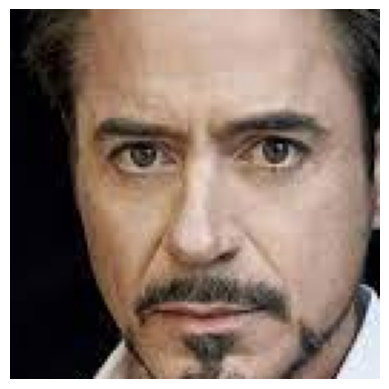

Image: robert_downey_jr4 (4).png (No annotation)


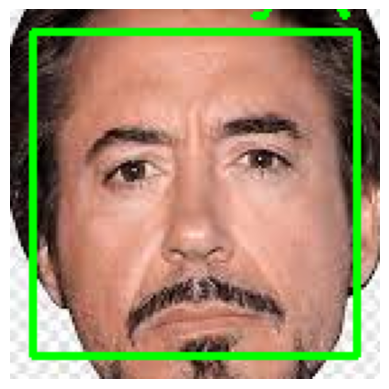

Image: robert_downey_jr1 (4).png → Label: Full-range (Far)
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 0.7519 - val_accuracy: 0.0000e+00 - val_loss: 2.3796
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.1348 - val_accuracy: 0.0000e+00 - val_loss: 7.1752
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.0000e+00 - val_loss: 14.0087
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 1.0000 - loss: 8.1360e-06 - val_accuracy: 0.0000e+00 - val_loss: 22.0856
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 1.0000 - loss: 9.4082e-09 - val_accuracy: 0.0000e+00 - val_loss: 31.0009
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 1.0000 - loss: 5.3130e-12 - val_accuracy: 0.0000e+00 - val_loss: 40.4678
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 1.0000 - loss: 1.8487e-15 - val_accuracy: 0.0000e+00 - val_loss: 50.2664
Epoch 8/10
1/

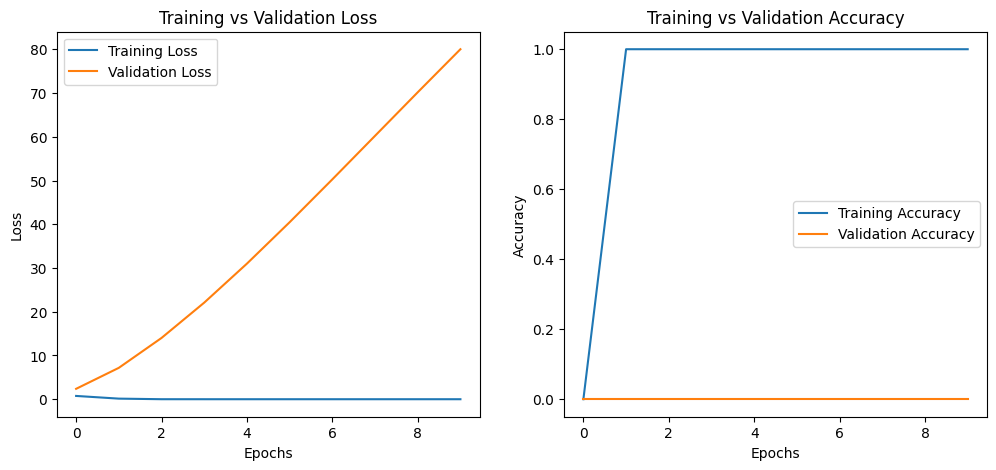

In [10]:
import cv2
import os
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

print("Upload images containing faces within 2 meters:")
uploaded_short_range = files.upload()

print("Upload images containing faces within 5 meters:")
uploaded_full_range = files.upload()

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


def show_image_without_annotation(image_file):
    img = cv2.imread(image_file)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print(f"Image: {image_file} (No annotation)")


def detect_and_label_faces(image_file):
    img = cv2.imread(image_file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    label_text = "Unknown"

    for (x, y, w, h) in faces:

        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)


        if w * h > 50000:
            label_text = "Short-range (Close-up)"
        else:
            label_text = "Full-range (Far)"

        cv2.putText(img, label_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print(f"Image: {image_file} → Label: {label_text}")


all_images = list(uploaded_short_range.keys()) + list(uploaded_full_range.keys())


if len(all_images) < 2:
    print("Please upload at least two images.")
else:

    show_image_without_annotation(all_images[0])


    detect_and_label_faces(all_images[1])


def load_and_preprocess_images(image_files, target_size=(128, 128)):
    images = []
    labels = []

    for img_file in image_files:
        img = cv2.imread(img_file)
        img = cv2.resize(img, target_size)
        img = img / 255.0
        images.append(img)


        if img_file in uploaded_short_range:
            labels.append(0)
        else:
            labels.append(1)

    return np.array(images), np.array(labels)


X, y = load_and_preprocess_images(all_images)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=8)


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.show()
